## DESAFIO PARA PARTICIPAÇÃO DE UM CURSO DE DS
Consiste em encontrar as notas dos alunos da disciplina de matemática.
Informações importantes para a análise se encontram no escopo desse notebook


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from scipy import stats
import statistics 
from sklearn import preprocessing
from sklearn import metrics
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [4]:
df_train = pd.read_csv('train.csv', sep="," , encoding="UTF8" )
df_test = pd.read_csv('test.csv', sep="," , encoding="UTF8" )

In [5]:
df_test_aux = df_test

## 1 - Tratameto de dados faltantes

**1.1 - Análise da variável de saída**

In [6]:
df_train['NU_NOTA_MT'].isnull().value_counts()

False    10133
True      3597
Name: NU_NOTA_MT, dtype: int64

In [7]:
df_train.loc[df_train['NU_NOTA_MT'].isna(),'NU_NOTA_MT'] = -999

Text(0.5, 1.0, 'Notas provas de matemática')

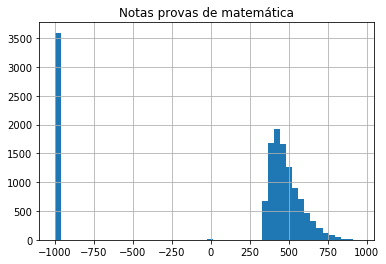

In [8]:
df_train['NU_NOTA_MT'].hist(bins=50)
plt.rcParams["figure.figsize"] = [10, 7]
plt.title('Notas provas de matemática')

Os valores faltanes (NaN) receberam o valor de -999 para que fosse visualizado sua quantidade nos gráficos.

-Mais de 3500 valores não foram incluídos

-A maior parre das nostas se concentra entre 380 e 550

**1.2 - Alunos que compareceram no dia da prova de Linguagens e códigos ['TP_INSCRICAO_LC']**

Insigh: Se os alunos foram esse dia, consequentemente eles fizeram a prova de matemática

In [9]:
df_train['TP_PRESENCA_LC'].value_counts()

1    10133
0     3592
2        5
Name: TP_PRESENCA_LC, dtype: int64

-3592 não fizeram a prova e receberam automaticamente a nota 0

-5 foram eliminados e também zeraram as provas de matemática

**1.3 - Verificação da existência de alunos que zeraram a prova com os dados faltantes nas notas de matemática**

In [10]:
df_train.loc[df_train[df_train['TP_PRESENCA_LC']== 0].index, 'NU_NOTA_MT'] = 0
df_train.loc[df_train[df_train['TP_PRESENCA_LC']== 2].index, 'NU_NOTA_MT'] = 0

Text(0.5, 1.0, 'Notas provas de matemática')

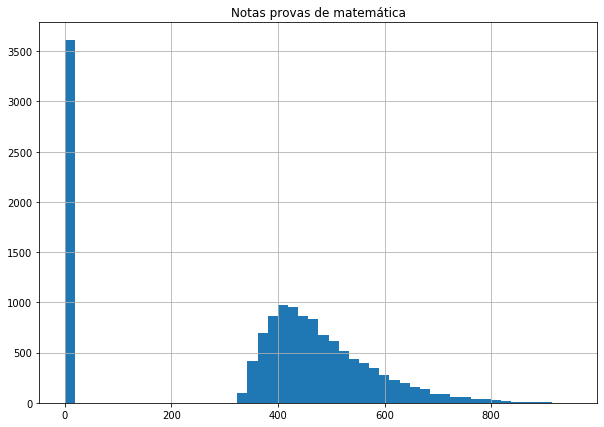

In [11]:
df_train['NU_NOTA_MT'].hist(bins=50)
plt.rcParams["figure.figsize"] = [10, 7]
plt.title('Notas provas de matemática')

In [12]:
valores_faltantes = df_train['NU_NOTA_MT'] == -999
valores_faltantes.value_counts()

False    13730
Name: NU_NOTA_MT, dtype: int64

In [13]:
y = df_train['NU_NOTA_MT']

Todas as notas faltantes da variável target foram completadas com zero, pois elas são referentes aos alunos que não foram ou foram eliminados.

**1.4 - Idendificar colunas presentes em ambos dataframes**

In [14]:
def colunas_em_ambos_dataframes(data_train, data_test):
    ambos = []
    for i in data_train.columns:
        for j in data_test.columns:
            if (i in  data_train.columns) & (i in data_test.columns):
                ambos.append(i)
    return list(np.unique(ambos))

In [15]:
colunas_ativas = colunas_em_ambos_dataframes(df_train, df_test)
df_train = df_train[colunas_ativas]
df_test = df_test[colunas_ativas]

In [16]:
df_train['NU_NOTA_MT'] = y

**1.5 - Identificar  colunas que tem valores nulos**

In [17]:
def identifica_colunas_nulas(data):
    cols = []
    faltante = []
    for col in data.columns:
        if data[col].isnull().value_counts().shape[0]==2:
            cols.append(col)
            faltante.append(data[col].isnull().value_counts()[1])
            dic_null = {'colunas':cols, 'Qtde NaN': faltante}
            df_null = pd.DataFrame.from_dict(dic_null)
    return df_null

In [18]:
colunas_nulas_train = identifica_colunas_nulas(df_train)
colunas_nulas_train

,colunas,Qtde NaN
0,NU_NOTA_CH,3389
1,NU_NOTA_CN,3389
2,NU_NOTA_COMP1,3597
3,NU_NOTA_COMP2,3597
4,NU_NOTA_COMP3,3597
5,NU_NOTA_COMP4,3597
6,NU_NOTA_COMP5,3597
7,NU_NOTA_LC,3597
8,NU_NOTA_REDACAO,3597
9,Q027,7373


In [19]:
colunas_nulas_test = identifica_colunas_nulas(df_test)
colunas_nulas_test

,colunas,Qtde NaN
0,NU_NOTA_CH,1134
1,NU_NOTA_CN,1134
2,NU_NOTA_COMP1,1199
3,NU_NOTA_COMP2,1199
4,NU_NOTA_COMP3,1199
5,NU_NOTA_COMP4,1199
6,NU_NOTA_COMP5,1199
7,NU_NOTA_LC,1199
8,NU_NOTA_REDACAO,1199
9,Q027,2488


As colunas 'Q027', 'TP_DEPENDENCIA_ADM_ESC', 'TP_ENSINO' serão excluidas devido a falta de informação para completá-las e o grande número de dados faltantes

In [20]:
df_train.drop(['Q027', 'TP_DEPENDENCIA_ADM_ESC', 'TP_ENSINO'], axis=1, inplace=True)
df_test.drop(['Q027', 'TP_DEPENDENCIA_ADM_ESC', 'TP_ENSINO'], axis=1, inplace=True)

C:\Users\Usuario\Anaconda3\envs\ml\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


No ENEM de 2016 as provas de linguages, códigos, matemática e redação foram realizadas no mesmo dia.
Se os alunos não frequentaram o dia da prova de ciências humanas ['TP_PRESENCA_LC'] ou foram eliminados as notas para esses casos são nulas.

In [21]:
completa_zero = ['NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','NU_NOTA_REDACAO','NU_NOTA_LC']

In [22]:
df_train.loc[df_train[df_train['TP_PRESENCA_LC']== 0].index, completa_zero] = 0
df_train.loc[df_train[df_train['TP_PRESENCA_LC']== 2].index, completa_zero] = 0
df_test.loc[df_test[df_test['TP_PRESENCA_LC']== 0].index, completa_zero] = 0
df_test.loc[df_test[df_test['TP_PRESENCA_LC']== 2].index, completa_zero] = 0

C:\Users\Usuario\Anaconda3\envs\ml\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Se o aluno não compareceu para fazer a prova o status da redação é branco (categoria 4) se é eliminado é anulada (categoria 2)

In [23]:
df_train.loc[df_train[df_train['TP_PRESENCA_LC']== 0].index, 'TP_STATUS_REDACAO'] = 4
df_train.loc[df_train[df_train['TP_PRESENCA_LC']== 2].index,'TP_STATUS_REDACAO'] = 2
df_test.loc[df_test[df_test['TP_PRESENCA_LC']== 0].index,'TP_STATUS_REDACAO'] = 4
df_test.loc[df_test[df_test['TP_PRESENCA_LC']== 2].index,'TP_STATUS_REDACAO'] = 2

Quem não frequetou o dia de ciências da natureza terá sua nota zerada tembem

In [24]:
df_train.loc[df_train[df_train['TP_PRESENCA_CH']== 0].index,'NU_NOTA_CH'] = 0
df_train.loc[df_train[df_train['TP_PRESENCA_CH']== 2].index, 'NU_NOTA_CH'] = 0
df_test.loc[df_test[df_test['TP_PRESENCA_CH']== 0].index, 'NU_NOTA_CH'] = 0
df_test.loc[df_test[df_test['TP_PRESENCA_CH']== 2].index, 'NU_NOTA_CH'] = 0

In [25]:
df_train.loc[df_train[df_train['TP_PRESENCA_CN']== 0].index, 'NU_NOTA_CN'] = 0
df_train.loc[df_train[df_train['TP_PRESENCA_CN']== 2].index, 'NU_NOTA_CN'] = 0
df_test.loc[df_test[df_test['TP_PRESENCA_CN']== 0].index, 'NU_NOTA_CN'] = 0
df_test.loc[df_test[df_test['TP_PRESENCA_CN']== 2].index, 'NU_NOTA_CN'] = 0

verificação de valores nulos no dataframe para garantir que não restou enenhum valor nulo

In [26]:
df_train.isna().sum()

CO_PROVA_CH          0
CO_PROVA_CN          0
CO_PROVA_LC          0
CO_PROVA_MT          0
CO_UF_RESIDENCIA     0
IN_BAIXA_VISAO       0
IN_CEGUEIRA          0
IN_DISCALCULIA       0
IN_DISLEXIA          0
IN_GESTANTE          0
IN_IDOSO             0
IN_SABATISTA         0
IN_SURDEZ            0
IN_TREINEIRO         0
NU_IDADE             0
NU_INSCRICAO         0
NU_NOTA_CH           0
NU_NOTA_CN           0
NU_NOTA_COMP1        0
NU_NOTA_COMP2        0
NU_NOTA_COMP3        0
NU_NOTA_COMP4        0
NU_NOTA_COMP5        0
NU_NOTA_LC           0
NU_NOTA_REDACAO      0
Q001                 0
Q002                 0
Q006                 0
Q024                 0
Q025                 0
Q026                 0
Q047                 0
SG_UF_RESIDENCIA     0
TP_ANO_CONCLUIU      0
TP_COR_RACA          0
TP_ESCOLA            0
TP_LINGUA            0
TP_NACIONALIDADE     0
TP_PRESENCA_CH       0
TP_PRESENCA_CN       0
TP_PRESENCA_LC       0
TP_SEXO              0
TP_STATUS_REDACAO    0
TP_ST_CONCL

In [27]:
df_test.isna().sum()

CO_PROVA_CH          0
CO_PROVA_CN          0
CO_PROVA_LC          0
CO_PROVA_MT          0
CO_UF_RESIDENCIA     0
IN_BAIXA_VISAO       0
IN_CEGUEIRA          0
IN_DISCALCULIA       0
IN_DISLEXIA          0
IN_GESTANTE          0
IN_IDOSO             0
IN_SABATISTA         0
IN_SURDEZ            0
IN_TREINEIRO         0
NU_IDADE             0
NU_INSCRICAO         0
NU_NOTA_CH           0
NU_NOTA_CN           0
NU_NOTA_COMP1        0
NU_NOTA_COMP2        0
NU_NOTA_COMP3        0
NU_NOTA_COMP4        0
NU_NOTA_COMP5        0
NU_NOTA_LC           0
NU_NOTA_REDACAO      0
Q001                 0
Q002                 0
Q006                 0
Q024                 0
Q025                 0
Q026                 0
Q047                 0
SG_UF_RESIDENCIA     0
TP_ANO_CONCLUIU      0
TP_COR_RACA          0
TP_ESCOLA            0
TP_LINGUA            0
TP_NACIONALIDADE     0
TP_PRESENCA_CH       0
TP_PRESENCA_CN       0
TP_PRESENCA_LC       0
TP_SEXO              0
TP_STATUS_REDACAO    0
TP_ST_CONCL

## 2 - Análise das correlações para escolha dos parâmetros de entrada

**2.1 - Correlação referente aos dados numéricos com a variável target que também é numérica**

In [28]:
var_numerica = ['NU_IDADE','NU_NOTA_CH','NU_NOTA_CN','NU_NOTA_COMP1','NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
              'NU_NOTA_COMP5', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']

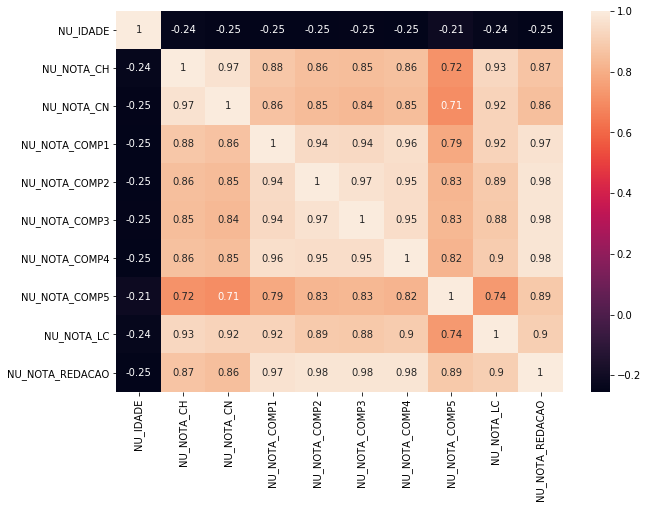

In [29]:
ax = sns.heatmap(df_train[var_numerica].corr(), annot=True)

Todas as variáveis numéricas serão consideradas para a obtenção do modelo, uma vez que a correlaão entre as variáveis de entrada
e a variável de saída forneceram valores elevados indicando uma alta correlação. A variável 'NU_IDADE' apesar de indicar uma baixa 
correlação em módulo quando comparada com as demais ela continuou sendo considerada uma vez que é a única variável com relação negativa.

**2.2 - Correlação entre as variáveis catégóricas e a variável target que é numérica**

In [30]:
var_categorica = np.array([i for i in df_train.columns for j in var_numerica if i!=j])
var_categorica = set(var_categorica)

Algumas variáveis categóricas já estão convertidas para números, as que não estão é necessário fazer essa conversão

In [31]:
df_train['TP_SEXO'] = pd.get_dummies(df_train['TP_SEXO'], drop_first=1)

In [32]:
def converte_var_categoricas(data):
    le = []
    i=0
    category_features = data.select_dtypes(include='object').columns
    for col_category in category_features:
        le.append(preprocessing.LabelEncoder())
        data[col_category] = le[i].fit_transform(data[col_category])
        i+=1
    return data

In [33]:
df_train = converte_var_categoricas(df_train)

In [34]:
df_test = converte_var_categoricas(df_test)

<ipython-input-32-c7b314909dd2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col_category] = le[i].fit_transform(data[col_category])


Corralação Biserial

In [35]:
def correlacao_biserial(data,target):
    b_corr_saida = []
    var_categorica = np.array([i for i in df_train.columns for j in var_numerica if i!=j])
    var_categorica = set(var_categorica)
    
    for col in var_categorica:
        b  = stats.pointbiserialr(df_train[col], df_train['NU_NOTA_MT'])
        bi =[b[0],b[1]]
        b_corr_saida.append(bi)

    b_cor_saida  = np.array(b_corr_saida).reshape(45,2)
    b_corr_saida = pd.DataFrame(b_corr_saida)
    b_corr_saida.columns = ['correlation', 'p-valor']
    b_corr_saida.index = var_categorica
    return b_corr_saida

In [36]:
corr_biserial = correlacao_biserial(df_train,'NU_NOTA_MT')

C:\Users\Usuario\Anaconda3\envs\ml\lib\site-packages\scipy\stats\stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


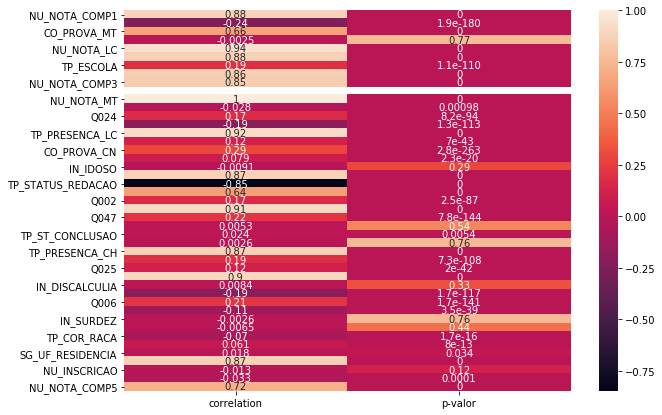

In [37]:
ax = sns.heatmap(corr_biserial, annot=True)

Seleção das variáveis categóricas que possuem correlação maiores que 0.2 em módulo

In [38]:
var_categoricas_usadas = corr_biserial[corr_biserial['correlation'] > abs(0.2)].index

In [39]:
variaveis_selecionadas = list(var_numerica) + list(var_categoricas_usadas)
variaveis_selecionadas

['NU_IDADE',
 'NU_NOTA_CH',
 'NU_NOTA_CN',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_LC',
 'NU_NOTA_REDACAO',
 'NU_NOTA_COMP1',
 'CO_PROVA_MT',
 'NU_NOTA_LC',
 'NU_NOTA_REDACAO',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_MT',
 'TP_PRESENCA_LC',
 'CO_PROVA_CN',
 'TP_PRESENCA_CN',
 'CO_PROVA_CH',
 'NU_NOTA_CN',
 'Q047',
 'TP_PRESENCA_CH',
 'NU_NOTA_CH',
 'Q006',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5']

**2.3 - Montando o dataframe para com as colunas selecionadas**

In [40]:
df_train = df_train[variaveis_selecionadas]
df_train

,NU_IDADE,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_COMP1,CO_PROVA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_MT,TP_PRESENCA_LC,CO_PROVA_CN,TP_PRESENCA_CN,CO_PROVA_CH,NU_NOTA_CN,Q047,TP_PRESENCA_CH,NU_NOTA_CH,Q006,NU_NOTA_COMP4,NU_NOTA_COMP5
0,24,495.4,436.3,120.0,120.0,120.0,80.0,80.0,581.2,520.0,120.0,8,581.2,520.0,120.0,120.0,399.4,1,1,1,5,436.3,0,1,495.4,2,80.0,80.0
1,17,544.1,474.5,140.0,120.0,120.0,120.0,80.0,599.0,580.0,140.0,8,599.0,580.0,120.0,120.0,459.8,1,7,1,3,474.5,0,1,544.1,1,120.0,80.0
2,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,0.0,0.0,0.0,0,3,0,1,0.0,0,0,0.0,2,0.0,0.0
3,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,0.0,0.0,0.0,0,3,0,1,0.0,3,0,0.0,4,0.0,0.0
4,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,0.0,0.0,0.0,0,3,0,1,0.0,0,0,0.0,2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13725,20,419.7,438.2,120.0,120.0,80.0,80.0,40.0,394.5,440.0,120.0,8,394.5,440.0,120.0,80.0,403.2,1,4,1,4,438.2,0,1,419.7,6,80.0,40.0
13726,33,557.9,423.8,120.0,120.0,120.0,120.0,80.0,533.0,560.0,120.0,7,533.0,560.0,120.0,120.0,452.4,1,7,1,3,423.8,0,1,557.9,2,120.0,80.0
13727,15,528.9,460.5,120.0,120.0,120.0,120.0,120.0,569.3,600.0,120.0,7,569.3,600.0,120.0,120.0,398.0,1,8,1,8,460.5,0,1,528.9,1,120.0,120.0
13728,36,621.7,422.5,100.0,100.0,80.0,80.0,100.0,569.0,460.0,100.0,6,569.0,460.0,100.0,80.0,386.6,1,4,1,4,422.5,0,1,621.7,6,80.0,100.0


In [41]:
col_sem_target = df_train.drop('NU_NOTA_MT',axis=1)
df_test = df_test[col_sem_target.columns]
df_test

,NU_IDADE,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_COMP1,CO_PROVA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_COMP2,NU_NOTA_COMP3,TP_PRESENCA_LC,CO_PROVA_CN,TP_PRESENCA_CN,CO_PROVA_CH,NU_NOTA_CN,Q047,TP_PRESENCA_CH,NU_NOTA_CH,Q006,NU_NOTA_COMP4,NU_NOTA_COMP5
0,22,443.5,464.8,120.0,80.0,80.0,100.0,40.0,431.8,420.0,120.0,7,431.8,420.0,80.0,80.0,1,1,1,5,464.8,0,1,443.5,2,100.0,40.0
1,26,491.1,391.1,120.0,120.0,120.0,120.0,100.0,548.0,580.0,120.0,3,548.0,580.0,120.0,120.0,1,7,1,7,391.1,0,1,491.1,2,120.0,100.0
2,21,622.7,595.9,80.0,40.0,40.0,80.0,80.0,613.6,320.0,80.0,8,613.6,320.0,40.0,40.0,1,1,1,5,595.9,0,1,622.7,3,80.0,80.0
3,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,0.0,0.0,0,3,0,1,0.0,0,0,0.0,6,0.0,0.0
4,18,492.6,592.9,100.0,80.0,60.0,80.0,0.0,571.4,320.0,100.0,6,571.4,320.0,80.0,60.0,1,4,1,4,592.9,0,1,492.6,7,80.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4571,17,558.2,398.3,120.0,120.0,120.0,100.0,40.0,511.6,500.0,120.0,7,511.6,500.0,120.0,120.0,1,1,1,5,398.3,0,1,558.2,3,100.0,40.0
4572,17,579.7,427.6,100.0,100.0,100.0,120.0,100.0,471.1,520.0,100.0,3,471.1,520.0,100.0,100.0,1,1,1,5,427.6,0,1,579.7,2,120.0,100.0
4573,19,643.8,639.2,160.0,140.0,120.0,140.0,80.0,604.9,640.0,160.0,8,604.9,640.0,140.0,120.0,1,6,1,3,639.2,3,1,643.8,3,140.0,80.0
4574,17,467.9,427.1,140.0,80.0,80.0,140.0,80.0,540.2,520.0,140.0,3,540.2,520.0,80.0,80.0,1,4,1,4,427.1,0,1,467.9,2,140.0,80.0


## 3 -  Obtenção do Modelo

Nessa etapa será utilizada apenas o dataframe de treinamento, para treinar e testar se a acurácia do modelo está pertinente.

**3.1 divindo dataframe em treino e teste**

In [42]:
X = df_train.drop('NU_NOTA_MT', axis=1)
X_train = X[0:8000]
X_test  = X[8000:13371]
y = df_train['NU_NOTA_MT']
y_train = y[0:8000]
y_test  = y[8000:13371]

**3.2 - Modelo escolhido Random Forest**

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [45]:
y_pred = rf.predict(X_test)

**3.2.1. Normalização dos dados para aplicar a métrica RMSE**

In [46]:
y_scaler = preprocessing.StandardScaler()

In [47]:
y_scaler.fit(pd.DataFrame(y_train))
y_test_scaler = y_scaler.transform(pd.DataFrame(y_test))

In [48]:
y_pred_scaler = y_scaler.transform(pd.DataFrame(y_pred))

Métrica RMSE

In [49]:
from sklearn.metrics import mean_squared_error

In [50]:
mean_squared_error(y_test_scaler, y_pred_scaler, squared=False)

0.2829215671385687

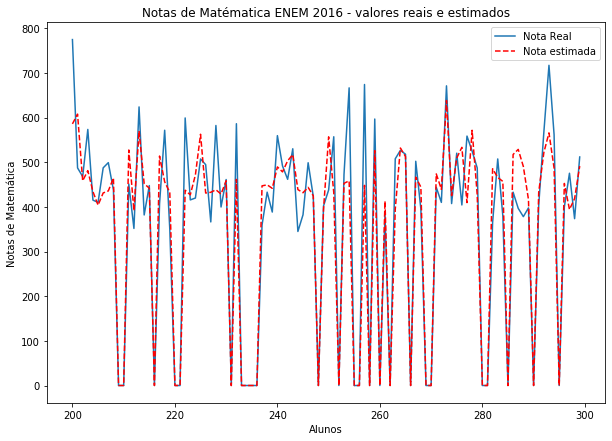

In [51]:
plt.plot(range(200,300), y_test[200:300], label = 'Nota Real')
plt.plot(range(200,300), y_pred[200:300], label = 'Nota estimada', color = 'red', linestyle = '--')
plt.title('Notas de Matématica ENEM 2016 - valores reais e estimados') #adicionando o título
plt.xlabel('Alunos') #definindo nome do eixo X
plt.ylabel('Notas de Matemática') #definindo nome do eixo Y

plt.legend(loc='best')

**3.3 - Análise das variáveis do modelo para uma possível redução de dimensionalidade**

In [52]:
rf.feature_importances_

array([6.19376674e-03, 1.21079178e-02, 3.24146963e-02, 1.16823515e-03,
       1.15716674e-03, 1.20983941e-03, 1.20515790e-03, 1.97751581e-03,
       4.62631894e-01, 2.75375739e-03, 1.17960277e-03, 3.20972519e-03,
       4.10720040e-01, 2.66473469e-03, 1.17761194e-03, 1.23190417e-03,
       0.00000000e+00, 2.12393138e-03, 3.13026086e-06, 2.45153377e-03,
       3.11298922e-02, 1.99080862e-03, 2.40934499e-06, 1.00072830e-02,
       6.09049407e-03, 1.23506184e-03, 1.96188995e-03])

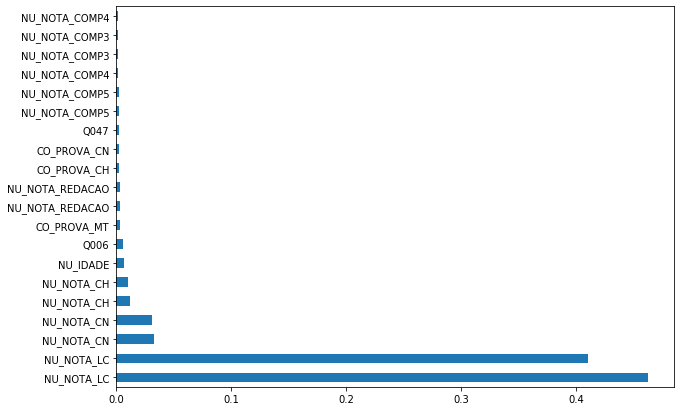

In [53]:
feat_imp = pd.Series(rf.feature_importances_, index=X_test.columns)
feat_imp.nlargest(20).plot(kind='barh')
plt.show()

As relevâncias de cada parâmetro do modelo são apresentadas no gráfico, dessa maneira será utilizado apenas as 8 primeiras variáveis mais relevantes.

**3.3.1 - Teste com dimensão reduzida**

In [54]:
var_relevantes = feat_imp.nlargest(8).index

In [55]:
df_train2 =  df_train[var_relevantes]

In [56]:
Xf_train = df_train2[0:8000]
Xf_test  = df_train2[8000:13371]

In [57]:
rf2 = RandomForestRegressor(n_estimators=100, random_state=0)
rf2.fit(Xf_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [58]:
y_pred2 = rf2.predict(Xf_test)

Normalização dos dados

In [59]:
y_pred_scaler2 = y_scaler.transform(pd.DataFrame(y_pred2))

In [60]:
mean_squared_error(y_test_scaler, y_pred_scaler2, squared=False)

0.287698715205787

Existiu um aumento ínfimo no índice RMSE de 0.005 aproximadamente, para esse caso como o aumento não é crítico (não acarreta nenhum prejuizo) então vou considerar o modelo que utiliza apenas 8 variáveis de entrada na sua composição

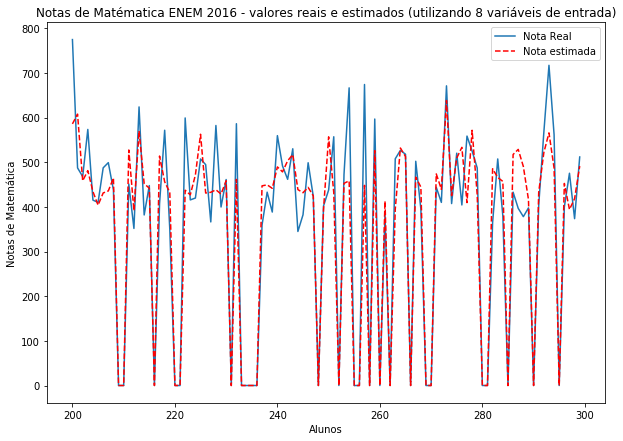

In [61]:
plt.plot(range(200,300), y_test[200:300], label = 'Nota Real')
plt.plot(range(200,300), y_pred[200:300], label = 'Nota estimada', color = 'red', linestyle = '--')
plt.title('Notas de Matématica ENEM 2016 - valores reais e estimados (utilizando 8 variáveis de entrada)') #adicionando o título
plt.xlabel('Alunos') #definindo nome do eixo X
plt.ylabel('Notas de Matemática') #definindo nome do eixo Y

plt.legend(loc='best')

## 3 -  Obtenção do Modelo utilizando o dataframe de test

In [62]:
X_train3 = df_train2
y_train = df_train['NU_NOTA_MT']
X_test3 = df_test[var_relevantes]

In [63]:
y_pred3 = rf2.fit(X_train3, y_train).predict(X_test3)

In [64]:
df_test_aux['NU_NOTA_MT'] =  y_pred3

In [65]:
answer = df_test_aux[['NU_INSCRICAO', 'NU_NOTA_MT']]
answer.head()

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,418.084
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,463.449
2,b38a03232f43b11c9d0788abaf060f7366053b6d,601.981
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0.000
4,715494628a50142ce8cb17191cfe6d0f3cae0934,581.549


In [66]:
answer.to_csv('answer.csv', index=False)